**pandas demo**

Евгений Борисов borisov.e@solarl.ru

---

про pandas 
- датасеты и серии
- конструирование датасетов
- загрузка данных и форматы данных
- сохранение данных и форматы данных
- заголовок таблицы
- обработка пропусков
- выборки
- индекс
- группировки
- merge
- статистики describe
- графики


In [84]:
import pandas as pd
import numpy as np
%matplotlib inline

In [9]:
pd.Series(data=[1,2,3,4,5])

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [10]:
pd.Series(data=[1,2,3,4,5],name='x',index=['a','b','c','d','e'])

a    1
b    2
c    3
d    4
e    5
Name: x, dtype: int64

In [13]:
pd.DataFrame( np.random.rand(5,3) )

,0,1,2
0,0.036339,0.375194,0.256280
1,0.644799,0.626741,0.037671
2,0.342745,0.438340,0.301325
3,0.975955,0.939250,0.786443
4,0.259242,0.341462,0.400521


In [18]:
pd.DataFrame( { 
    'a':np.random.rand(5), 
    'b':range(5), 
    'c':['a','b','c','d','e'], 
              } )

,a,b,c
0,0.273489,0,a
1,0.631648,1,b
2,0.094898,2,c
3,0.621894,3,d
4,0.470872,4,e


---

In [62]:
# df = pd.read_csv('../data/uci/forestfires.csv.gz')
# df = pd.read_csv('../data/uci/iris.csv.gz',header=None)
# df = pd.read_csv('../data/uci/iris-bezdek.csv.gz',header=None)
# df = pd.read_csv('../data/uci/wine.csv.gz',header=None)
# df = pd.read_csv('../data/uci/winequality-red.csv.gz',sep=';')
# df = pd.read_csv('../data/uci/winequality-white.csv.gz',sep=';')
df = pd.read_csv('../data/uci/abalone.csv.gz',header=None)

len(df)

4177

In [63]:
df.head(3)

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [68]:
df.columns = [ 'a','b','c','d','e','f','g','h','i' ]

In [69]:
df.sample(3)

,a,b,c,d,e,f,g,h,i
795,M,0.515,0.405,0.145,0.6950,0.2150,0.1635,0.234,15
2155,M,0.580,0.460,0.165,1.2275,0.4730,0.1965,0.435,16
3860,F,0.550,0.465,0.150,1.0820,0.3575,0.1940,0.190,14


In [70]:
df.isnull().sum()

a    0
b    0
c    0
d    0
e    0
f    0
g    0
h    0
i    0
dtype: int64

In [71]:
df.describe()

,b,c,d,e,f,g,h,i
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


---

In [78]:
df.iloc[0,4]

0.514

In [80]:
df.loc[df['a']=='M','c'].head(3)

0    0.365
1    0.265
3    0.365
Name: c, dtype: float64

In [83]:
df[df['a']=='F']['i'].head(3)

2     9
6    20
7    16
Name: i, dtype: int64

---

In [73]:
df.groupby('a').min()

,b,c,d,e,f,g,h,i
a,,,,,,,,
F,0.275,0.195,0.015,0.0800,0.0310,0.0210,0.0250,5
I,0.075,0.055,0.000,0.0020,0.0010,0.0005,0.0015,1
M,0.155,0.110,0.025,0.0155,0.0065,0.0030,0.0050,3


In [74]:
df.groupby(['a','i']).min()

b      c      d       e       f       g       h
a i                                                      
F 5   0.275  0.195  0.070  0.0800  0.0310  0.0215  0.0250
  6   0.290  0.210  0.070  0.1700  0.0760  0.0210  0.0350
  7   0.305  0.225  0.070  0.1485  0.0585  0.0335  0.0450
  8   0.360  0.265  0.080  0.2065  0.0780  0.0260  0.0600
  9   0.330  0.255  0.015  0.1970  0.0625  0.0500  0.0600
  10  0.345  0.260  0.065  0.2050  0.0745  0.0370  0.0700
  11  0.410  0.305  0.100  0.3630  0.1250  0.0650  0.0985
  12  0.380  0.300  0.100  0.2810  0.1045  0.0615  0.0900
  13  0.390  0.300  0.100  0.2650  0.1075  0.0460  0.0865
  14  0.460  0.355  0.115  0.4485  0.1650  0.0830  0.1700
  15  0.465  0.360  0.120  0.5370  0.1725  0.1075  0.1595
  16  0.395  0.315  0.105  0.3515  0.1185  0.0910  0.1195
  17  0.490  0.360  0.105  0.4980  0.1610  0.1070  0.1700
  18  0.465  0.350  0.130  0.4940  0.1945  0.1030  0.1550
  19  0.505  0.410  0.140  0.8115  0.2400  0.1510  0.2400
  20  0.500  0.400  0.150  0.7105  0.2370  0.1415  0.2250
  21  0.490  0.365  0.125  0.6835  0.1650  0.1290  0.2050
  22  0.520  0.395  0.170  0.6400  0.1580  0.1100  0.2450
  23  0.450  0.380  0.135  0.7750  0.2410  0.1400  0.2400
  24  0.700  0.540  0.215  1.9780  0.6675  0.3125  0.7100
  25  0.645  0.490  0.215  1.4060  0.4265  0.2285  0.5100
  27  0.550  0.465  0.180  1.2125  0.3245  0.2050  0.5250
  29  0.700  0.585  0.185  1.8075  0.7055  0.3215  0.4750
I 1   0.075  0.055  0.010  0.0020  0.0010  0.0005  0.0015
  2   0.150  0.100  0.025  0.0150  0.0045  0.0040  0.0050
  3   0.110  0.090  0.025  0.0080  0.0025  0.0020  0.0030
  4   0.130  0.095  0.015  0.0105  0.0050  0.0005  0.0035
  5   0.160  0.120  0.025  0.0210  0.0075  0.0035  0.0050
  6   0.170  0.125  0.000  0.0235  0.0090  0.0055  0.0080
  7   0.265  0.195  0.055  0.0840  0.0305  0.0130  0.0250
...     ...    ...    ...     ...     ...     ...     ...
  16  0.440  0.330  0.135  0.4350  0.1590  0.0905  0.1275
  17  0.535  0.420  0.145  0.8605  0.3120  0.1690  0.2500
  18  0.485  0.370  0.125  0.4775  0.1850  0.0705  0.1690
  19  0.450  0.355  0.120  0.4120  0.1145  0.0665  0.1600
  20  0.530  0.420  0.170  0.7520  0.2990  0.1560  0.2050
  21  0.530  0.415  0.145  0.9440  0.3845  0.1850  0.2650
M 3   0.155  0.110  0.040  0.0155  0.0065  0.0030  0.0050
  4   0.165  0.125  0.040  0.0240  0.0095  0.0045  0.0050
  5   0.155  0.115  0.025  0.0240  0.0090  0.0050  0.0075
  6   0.260  0.190  0.065  0.0945  0.0385  0.0195  0.0300
  7   0.205  0.155  0.045  0.0425  0.0170  0.0055  0.0155
  8   0.255  0.195  0.065  0.0800  0.0315  0.0180  0.0270
  9   0.295  0.225  0.075  0.1295  0.0455  0.0295  0.0440
  10  0.290  0.225  0.065  0.1295  0.0535  0.0260  0.0450
  11  0.310  0.235  0.060  0.1200  0.0415  0.0330  0.0400
  12  0.350  0.265  0.080  0.1775  0.0575  0.0420  0.0680
  13  0.350  0.255  0.085  0.2145  0.1000  0.0465  0.0600
  14  0.430  0.330  0.095  0.3400  0.1315  0.0760  0.1120
  15  0.420  0.325  0.095  0.2885  0.1000  0.0570  0.1085
  16  0.440  0.350  0.120  0.4510  0.1710  0.0705  0.1840
  17  0.515  0.400  0.115  0.7395  0.2610  0.1230  0.2500
  18  0.425  0.315  0.120  0.3525  0.1135  0.0565  0.1300
  19  0.500  0.380  0.145  0.6600  0.2655  0.1365  0.2150
  20  0.530  0.415  0.130  0.8425  0.2750  0.1390  0.2650
  21  0.490  0.390  0.150  0.5730  0.2250  0.1240  0.1700
  22  0.545  0.420  0.140  0.7505  0.2475  0.1300  0.2550
  23  0.515  0.400  0.150  0.8175  0.2515  0.1560  0.3000
  24  0.690  0.540  0.185  1.6195  0.5330  0.3530  0.5550
  26  0.600  0.495  0.195  1.0575  0.3840  0.1900  0.3750
  27  0.665  0.535  0.225  2.1835  0.7535  0.3910  0.8850

[68 rows x 7 columns]

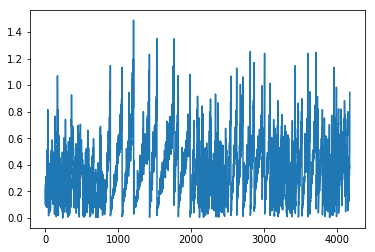

In [89]:
df['f'].plot()

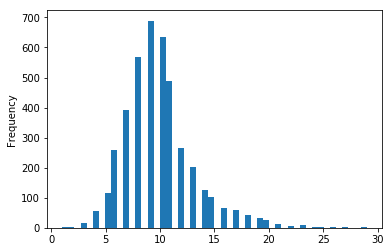

In [90]:
df['i'].plot.hist(bins=50)

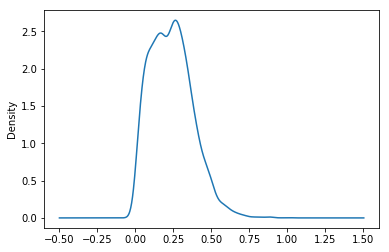

In [91]:
df['h'].plot.kde()